In [1]:
%matplotlib inline
from galaxy_analysis.plot.plot_styles import *
import matplotlib.pyplot as plt
from galaxy_analysis.analysis import Galaxy
import numpy as np
import yt
from galaxy_analysis.utilities import convert_abundances


/home/emerick/anaconda2/lib/python2.7/site-packages/astroML/time_series/periodogram.py:8: UserWarning: Using slow version of lomb_scargle. Install astroML_addons to use an optimized version
  warnings.warn("Using slow version of lomb_scargle. Install astroML_addons "
/home/emerick/code/galaxy_analysis/particle_analysis/IMF.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/emerick/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/emerick/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module

/home/emerick/code/galaxy_analysis/particle_analysis/sn_rate.py:4: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/emerick/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/emerick/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/emerick/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 477

/home/emerick/code/galaxy_analysis/plot/plot_styles.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/emerick/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/emerick/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/emerick/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 477, in star

In [2]:
#gal = Galaxy('DD0559', wdir = '/home/emerick/work/enzo_runs/pleiades/starIC/run11_30km_3pc/otrad_ion-nosn/')

gal = Galaxy('DD0752', wdir = '/home/emerick/work/enzo_runs/pleiades/starIC/run11_30km/final_sndriving/') #_3pc/otrad_ion-nosn/')

Parsing Hierarchy : 100%|██████████| 780/780 [00:00<00:00, 14149.91it/s]
/home/emerick/anaconda2/lib/python2.7/site-packages/yt/fields/local_fields.py:46: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
  warnings.warn("Because 'sampling_type' not specified, yt will "


tracer species present:  ['C', 'N', 'O', 'Na', 'Mg', 'Si', 'S', 'Ca', 'Mn', 'Fe', 'Ni', 'As', 'Sr', 'Y', 'Ba']
16 mass fields defined
16 mass fraction fields defined
15 number density fields defined
141 abundance ratio fields defined
141 particle abundance ratio fields defined
5 additional helper fields defined


Parsing Hierarchy : 100%|██████████| 780/780 [00:00<00:00, 25222.28it/s]
/home/emerick/code/onezone/data_tables.py:89: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if  c == flag or id == flag:


In [3]:
def is_alive(data, t):
    
    lifetime = data[('io','particle_model_lifetime')].convert_to_units('Myr')
    t0       = data['creation_time'].convert_to_units('Myr')
    alive    = np.array([True] * np.size(t0))
    
    not_born    = t <  t0
    dead        = t > (t0 + lifetime)
    alive[not_born] = False
    alive[dead]     = False
    
    return alive
    
    

In [4]:
gal.ds.field_list

[('all', 'birth_mass'),
 ('all', 'creation_time'),
 ('all', 'dynamical_time'),
 ('all', 'metallicity_fraction'),
 ('all', 'particle_As_fraction'),
 ('all', 'particle_Ba_fraction'),
 ('all', 'particle_C_fraction'),
 ('all', 'particle_Ca_fraction'),
 ('all', 'particle_Fe_fraction'),
 ('all', 'particle_H_fraction'),
 ('all', 'particle_He_fraction'),
 ('all', 'particle_Mg_fraction'),
 ('all', 'particle_Mn_fraction'),
 ('all', 'particle_N_fraction'),
 ('all', 'particle_Na_fraction'),
 ('all', 'particle_Ni_fraction'),
 ('all', 'particle_O_fraction'),
 ('all', 'particle_S_fraction'),
 ('all', 'particle_Si_fraction'),
 ('all', 'particle_Sr_fraction'),
 ('all', 'particle_Y_fraction'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('all', 'particle_type'),
 ('all', 'particle_velocity_x'),
 ('all', 'particle_velocity_y'),
 ('all', 'particle_velocity_z'),
 ('all', 'rad_table_T_pos'),
 ('all

/home/emerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in divide


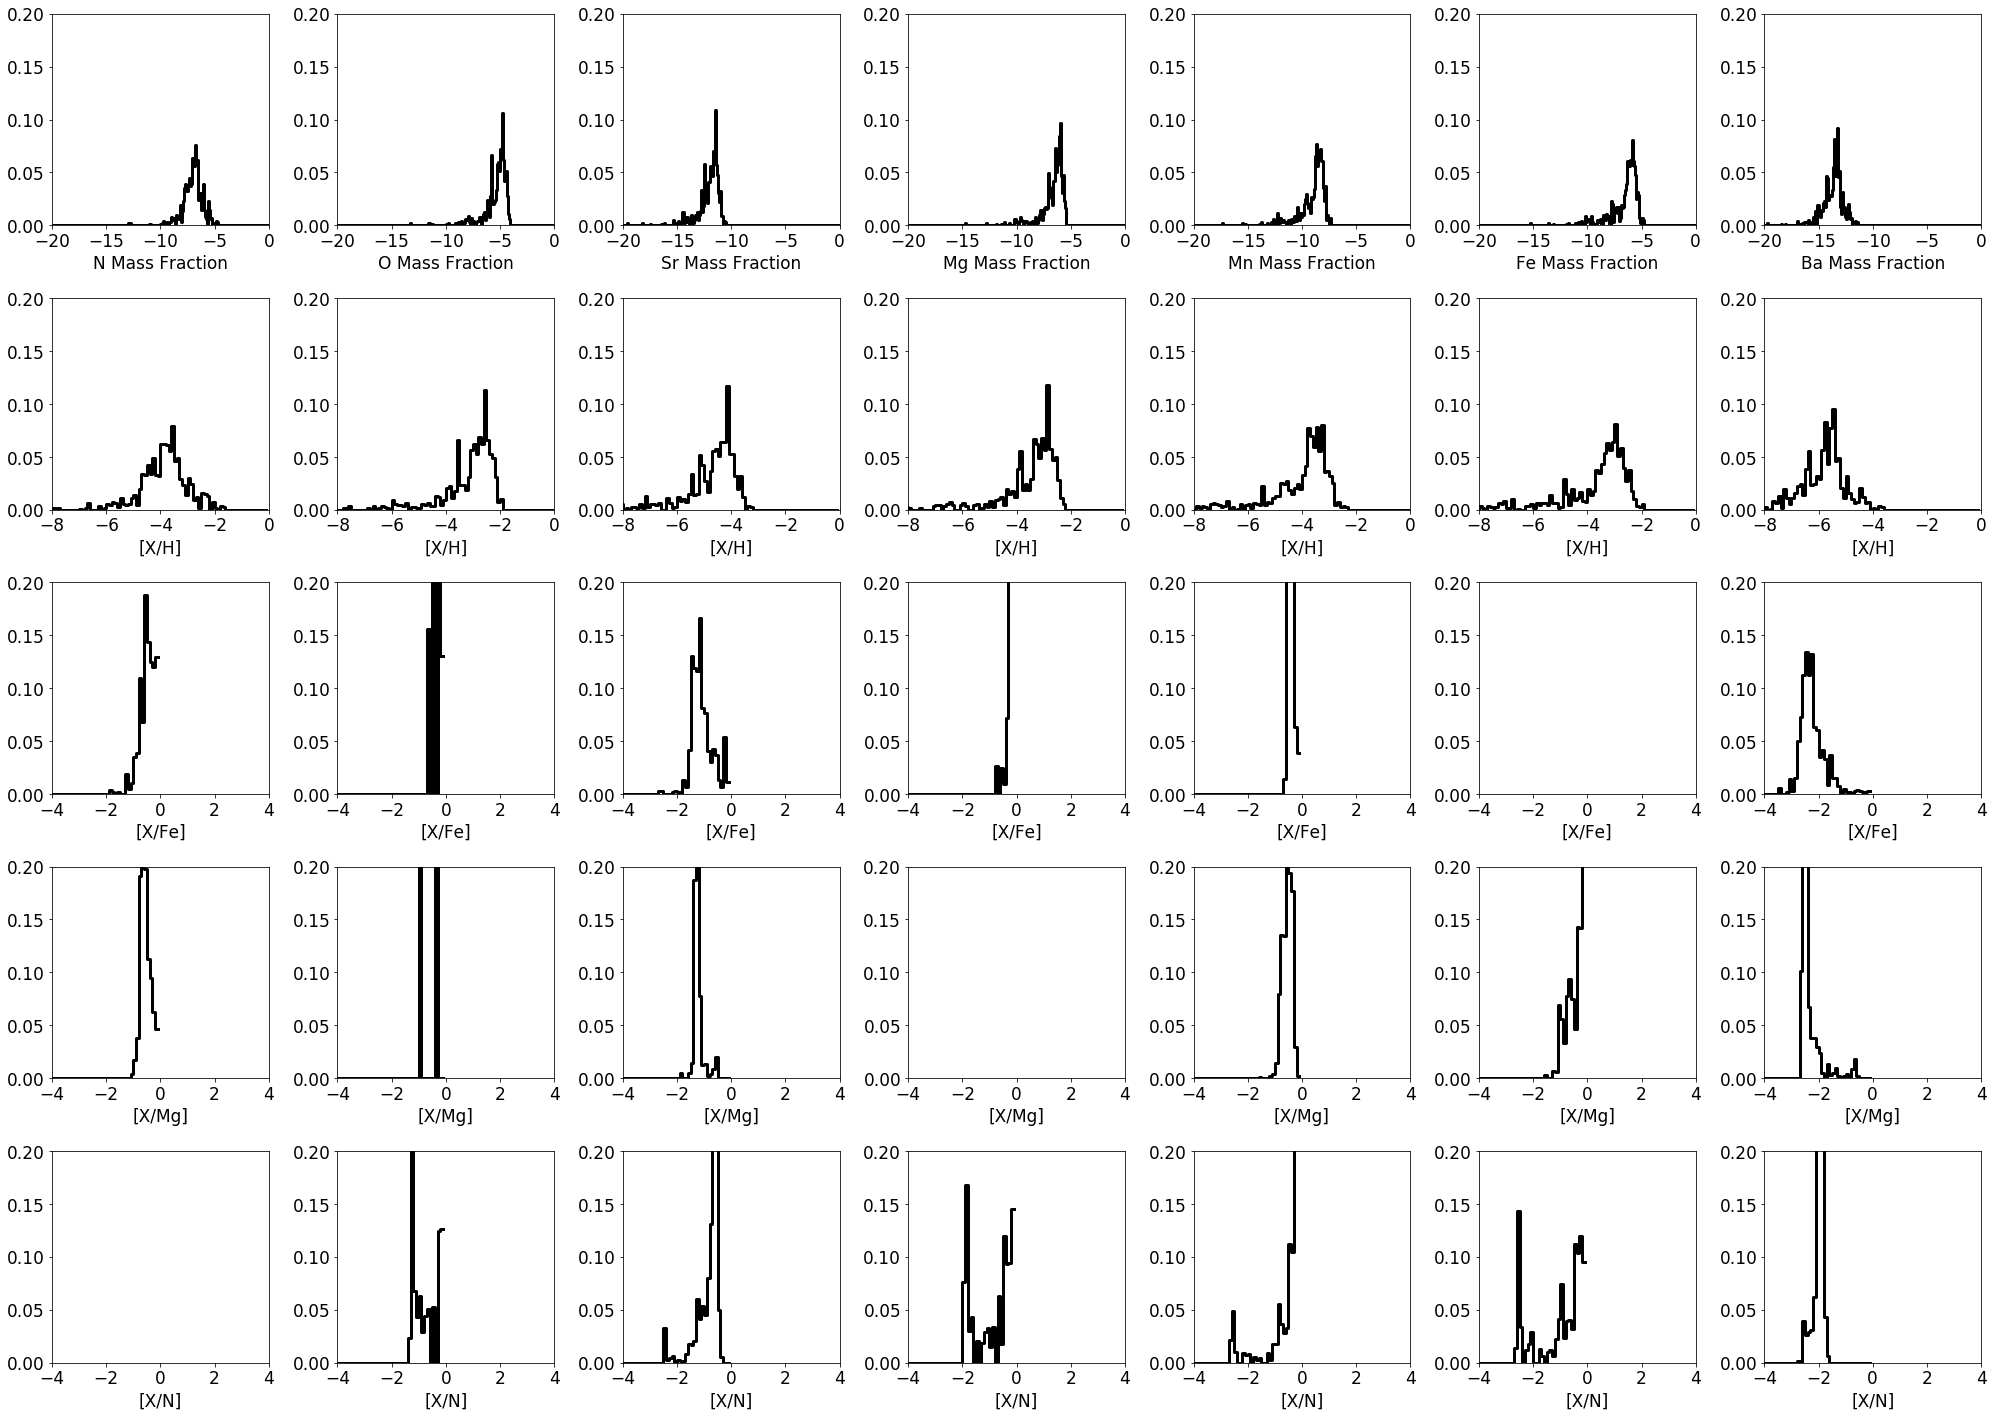

In [7]:
t = 500.0 * yt.units.Myr
select = is_alive(gal.df, t)

elements = ['N','O','Sr','Mg','Mn','Fe','Ba']

nrow = 5
ncol = 7
fig,ax = plt.subplots(nrow, ncol)
fig.set_size_inches(ncol*4,nrow*4)

axi = 0
axj = 0
bins = np.arange(-30,0, 0.1)
norm = 1.0

for denom in [None, 'H','Fe','Mg','N']:
    
    for e in elements:
        index = (axi,axj)
        
        if denom is None:
            field = 'particle_' + e + '_fraction'
            xdata = np.log10(gal.df[('all',field)])
        else:
            if e == denom:
                xdata = np.zeros(np.size(xdata))
            else:
                field = 'particle_' + e + '_over_' + denom
                xdata = gal.df[('io',field)]
            
    
        hist,bins = np.histogram(xdata[select], bins = bins)
        #dx   = 10.0**(bins[1:]) - 10.0**(bins[:-1])
        norm = 1.0*np.sum(hist)
        plot_histogram(ax[index], bins, hist / (norm), lw = 3, color = 'black', ls = '-')

        #hist, bins = np.histogram(xdata, bins = bins)
        #dx   = 10.0**(bins[1:]) - 10.0**(bins[:-1])
        #norm = 1.0*np.sum(hist)*dx
        #plot_histogram(ax[index], bins, hist / (norm), lw = 3, color = 'red', ls = '--')

        ax[index].set_ylim(0,0.2)
        #ax[index].semilogy()
        
        if denom is None:
            ax[index].set_xlabel(e + ' Mass Fraction')
            ax[index].set_xlim(-20,0)
        else:
            ax[index].set_xlabel('[X/' + denom +']')
            if denom == 'H':
                ax[index].set_xlim(-8,0)
            else:
                ax[index].set_xlim(-4,4)
            
        #ax[index].set_ylabel('Fraction of Stars')
    
        axj = axj + 1
        if axj >= ncol:
            axj = 0
            axi = axi + 1
            

plt.tight_layout()
fig.savefig('MDFs.png')

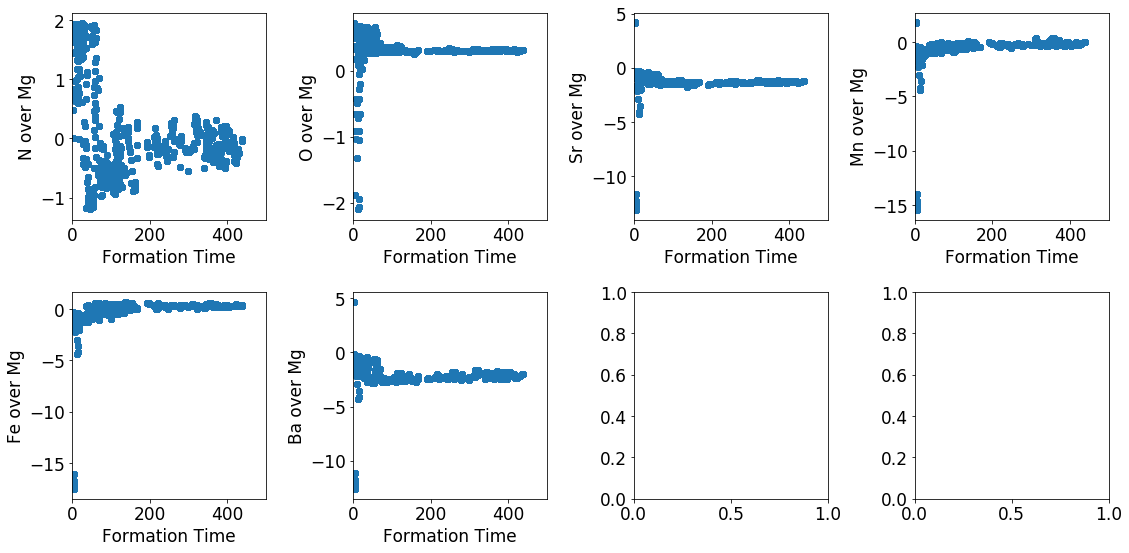

In [6]:
t = 500.0 * yt.units.Myr
select = is_alive(gal.df, t)

elements = ['N','O','Sr','Mg','Mn','Fe','Ba']

nrow = 2
ncol = 4
fig,ax = plt.subplots(nrow, ncol)
fig.set_size_inches(ncol*4,nrow*4)

axi = 0
axj = 0

denom_element = 'Mg'
xdata = gal.df['creation_time'].convert_to_units('Myr')
xdata = xdata - np.min(xdata)

bins = np.arange(-30,0, 0.1)
for e in elements:
    index = (axi,axj)
    if e == denom_element:
        continue
        
    ydata = gal.df[('io','particle_' + e + '_over_' + denom_element)]
    
    ax[index].scatter(xdata[select], ydata[select])
    

    #ax[index].set_xlim(-20,0)
    #ax[index].set_ylim(0,1)
    #ax[index].semilogy()
    ax[index].set_ylabel(e + ' over ' + denom_element)
    ax[index].set_xlabel('Formation Time')
    ax[index].set_xlim(0,500)

    
    axj = axj + 1
    if axj >= ncol:
        axj = 0
        axi = axi + 1
        
plt.tight_layout()


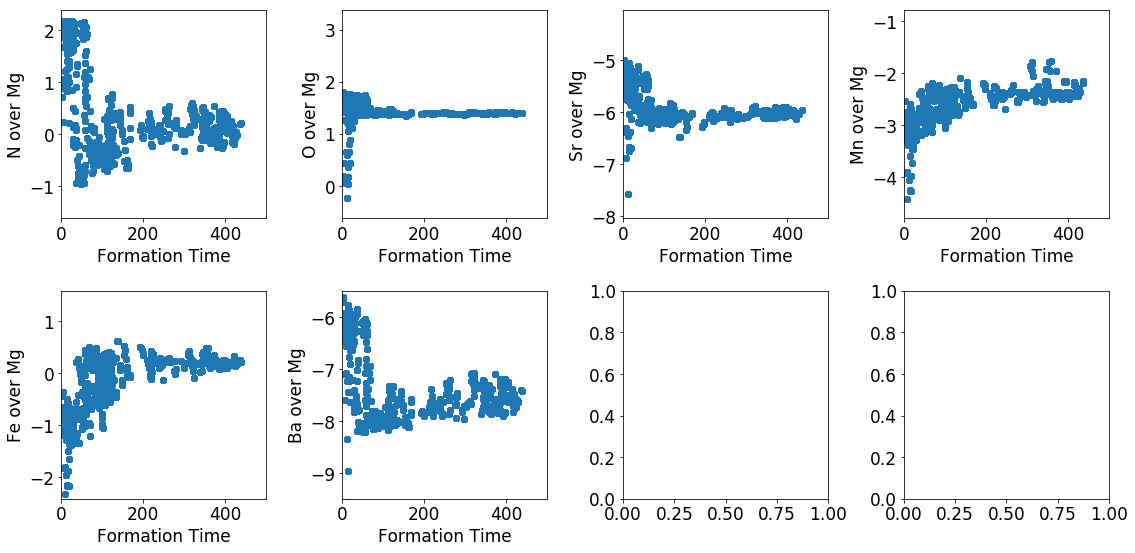

In [7]:
t = 500.0 * yt.units.Myr
select = is_alive(gal.df, t)

elements = ['N','O','Sr','Mg','Mn','Fe','Ba']

nrow = 2
ncol = 4
fig,ax = plt.subplots(nrow, ncol)
fig.set_size_inches(ncol*4,nrow*4)

axi = 0
axj = 0

denom_element = 'Mg'
xdata = gal.df['creation_time'].convert_to_units('Myr')
xdata = xdata - np.min(xdata)

bins = np.arange(-30,0, 0.1)
for e in elements:
    index = (axi,axj)
    if e == denom_element:
        continue
        
    ydata = gal.df[('io','particle_' + e + '_over_' + denom_element)]
    
    ydata = convert_abundances.renormalize(ydata, e, denom_element)
    
    ax[index].scatter(xdata[select], ydata[select])

    #ax[index].set_xlim(-20,0)
    #ax[index].set_ylim(0,1)
    #ax[index].semilogy()
    ax[index].set_ylabel(e + ' over ' + denom_element)
    ax[index].set_xlabel('Formation Time')
    ax[index].set_xlim(0,500)

    ax[index].set_ylim(np.average(ydata[select]) - 2, np.average(ydata[select]) + 2)

    axj = axj + 1
    if axj >= ncol:
        axj = 0
        axi = axi + 1
        
plt.tight_layout()


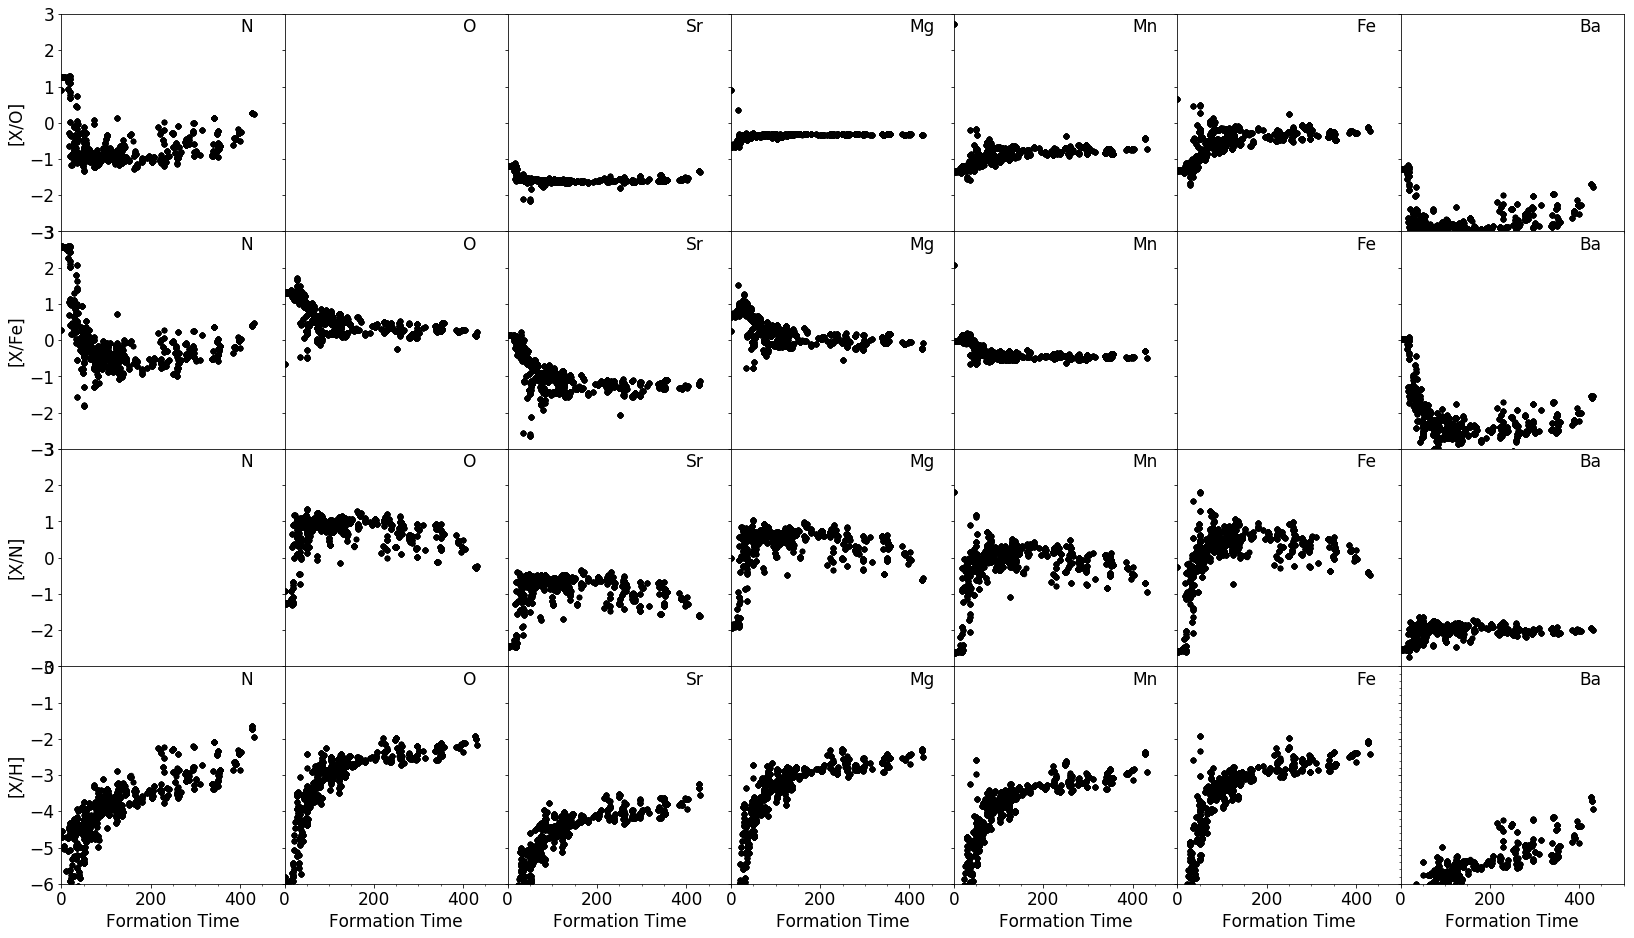

In [5]:
t = 500.0 * yt.units.Myr
select = is_alive(gal.df, t)

elements = ['N','O','Sr','Mg','Mn','Fe','Ba']

nrow = 4
ncol = 7
fig,ax = plt.subplots(nrow, ncol, sharex=True)
fig.set_size_inches(ncol*4,nrow*4)


   
axi = 0
axj = 0
    


bins = np.arange(-30,0, 0.1)
for denom_element in ['O','Fe','N','H']:
    xdata = gal.df['creation_time'].convert_to_units('Myr')
    xdata = xdata - np.min(xdata) 
 
    axj = 0
    for e in elements:
        index = (axi,axj)
        
        if e == denom_element:
            ydata = np.ones(np.size(xdata))*-100
        else:
            ydata = gal.df[('io','particle_' + e + '_over_' + denom_element)]
        
     
        ax[index].scatter(xdata[select], ydata[select], color = 'black', s = 20, alpha = 0.5)
    

    #ax[index].set_xlim(-20,0)
        if denom_element == 'H':
            ax[index].set_ylim(-6, 0)
            xy = (400, -0.5)
            ax[index].annotate(e, xy, xy)
        else:
            ax[index].set_ylim(-3,3)
    #ax[index].semilogy()
            xy = (400,2.5)
            ax[index].annotate(e, xy, xy)
        ax[index].set_xlim(0,500)

        if axj == 0:
            ax[index].set_ylabel('[X/' + denom_element + ']')
        if axi == nrow - 1:
            ax[index].set_xlabel('Formation Time')
    
        axj = axj + 1
        if axj >= ncol:
            axj = 0
            axi = axi + 1
        
fig.subplots_adjust(hspace = 0, wspace = 0)

plt.setp([a.get_xticklabels() for a in fig.axes[:-ncol]], visible = False)

axi = 0
axj = 0
for a in fig.axes:

    if axj != 0:
        plt.setp(a.get_yticklabels(), visible = False)
    
    axj = axj + 1
    if axj >= ncol:
        axj = 0
        axi = axi + 1
#plt.setp([a.get_yticklabels() for a in fig.axes[:-ncol]], visible = False)

plt.minorticks_on()

#plt.tight_layout()
fig.savefig('stellar_abundances_time.png')

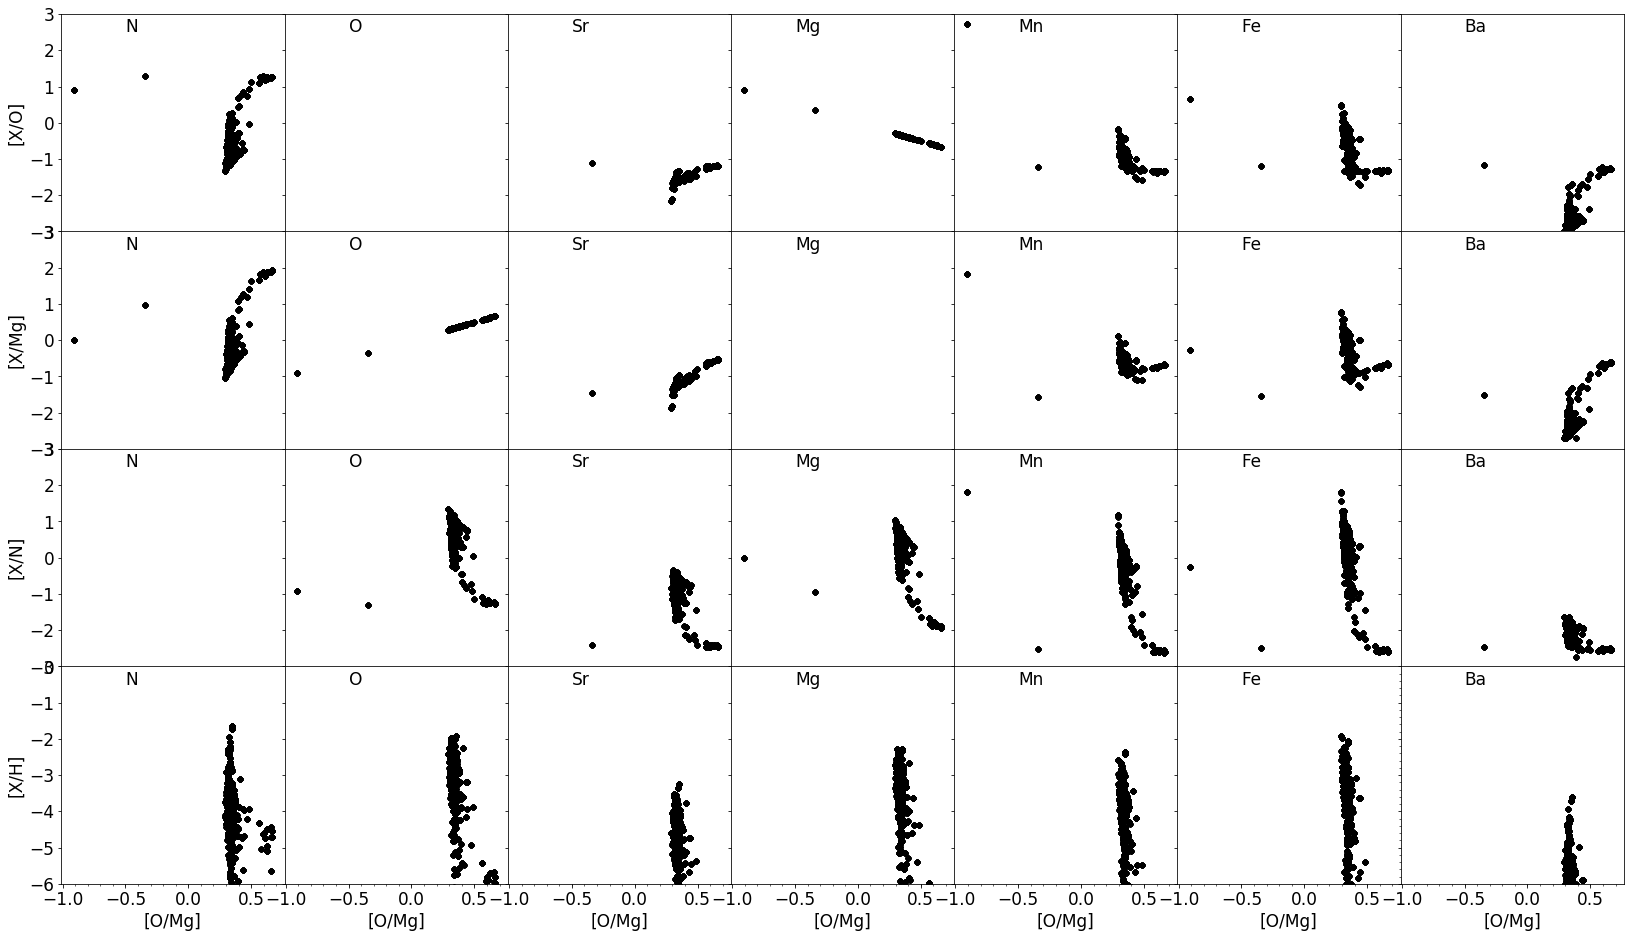

In [10]:
t = 500.0 * yt.units.Myr
select = is_alive(gal.df, t)

elements = ['N','O','Sr','Mg','Mn','Fe','Ba']

nrow = 4
ncol = 7
fig,ax = plt.subplots(nrow, ncol, sharex=True)
fig.set_size_inches(ncol*4,nrow*4)


   
axi = 0
axj = 0
    
x1 = 'O'
x2 = 'Mg'

bins = np.arange(-30,0, 0.1)
for denom_element in ['O','Mg','N','H']:
#    xdata = gal.df['creation_time'].convert_to_units('Myr')
#    xdata = xdata - np.min(xdata) 
    xdata = gal.df[('io','particle_'+ x1 + '_over_' + x2)]

    
    axj = 0
    for e in elements:
        index = (axi,axj)
        
        if e == denom_element:
            ydata = np.ones(np.size(xdata))*-100
        else:
            ydata = gal.df[('io','particle_' + e + '_over_' + denom_element)]
        
     
        ax[index].scatter(xdata[select], ydata[select], s = 20, color = 'black')
    

    #ax[index].set_xlim(-20,0)
        if denom_element == 'H':
            ax[index].set_ylim(-6, 0)
            xy = (-0.5, -0.5)
            ax[index].annotate(e, xy, xy)
        else:
            ax[index].set_ylim(-3,3)
    #ax[index].semilogy()
            xy = (-0.5,2.5)
            ax[index].annotate(e, xy, xy)
            
        if x1 == 'O' and x2 == 'H':
            ax[index].set_xlim(-6.5, 0.5)
        if x1 == 'Mg' and x2 == 'H':
            ax[index].set_xlim(-6.5, 0.5)

        if axj == 0:
            ax[index].set_ylabel('[X/' + denom_element + ']')
        if axi == nrow - 1:
            ax[index].set_xlabel('[' + x1 + '/' + x2 + ']')
    
        axj = axj + 1
        if axj >= ncol:
            axj = 0
            axi = axi + 1
        
fig.subplots_adjust(hspace = 0, wspace = 0)

plt.setp([a.get_xticklabels() for a in fig.axes[:-ncol]], visible = False)

axi = 0
axj = 0
for a in fig.axes:

    if axj != 0:
        plt.setp(a.get_yticklabels(), visible = False)
    
    axj = axj + 1
    if axj >= ncol:
        axj = 0
        axi = axi + 1
#plt.setp([a.get_yticklabels() for a in fig.axes[:-ncol]], visible = False)

plt.minorticks_on()

#plt.tight_layout()
fig.savefig('stellar_abundances_' + x1 + '_over_' + x2 + '.png')

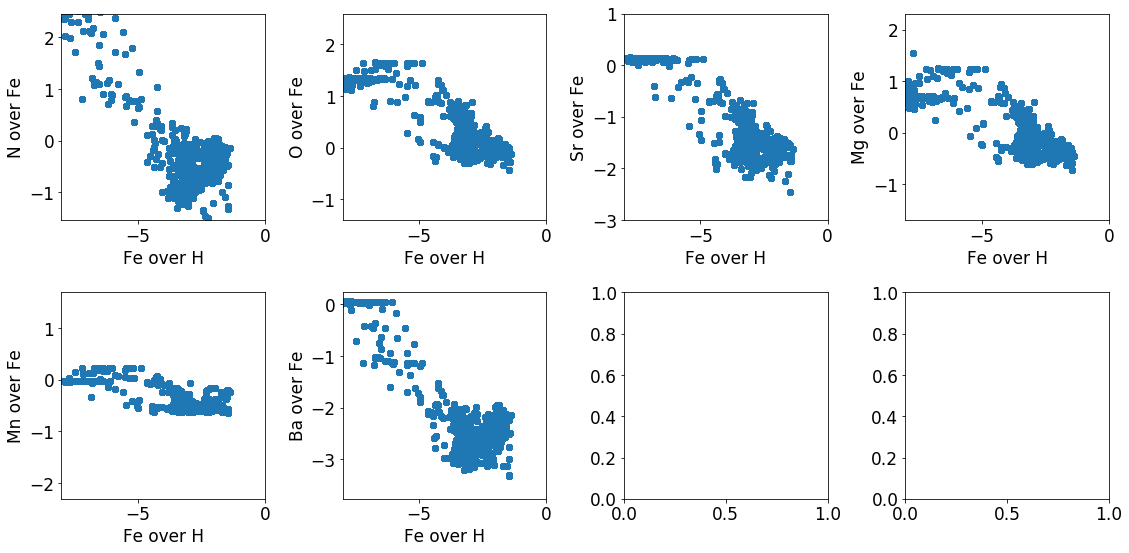

In [10]:
t = 500.0 * yt.units.Myr
select = is_alive(gal.df, t)

elements = ['N','O','Sr','Mg','Mn','Fe','Ba']

nrow = 2
ncol = 4
fig,ax = plt.subplots(nrow, ncol)
fig.set_size_inches(ncol*4,nrow*4)

axi = 0
axj = 0

denom_element = 'Fe'
xdata = gal.df['creation_time'].convert_to_units('Myr')
#xdata = xdata - np.min(xdata)

e1 = 'Fe'
e2 = 'H'
xdata = gal.df[('io','particle_' + e1 + '_over_' + e2)]
#xdata = convert_abundances.renormalize(xdata, e1,e2)

bins = np.arange(-30,0, 0.1)
for e in elements:
    index = (axi,axj)
    if e == denom_element:
        continue
        
    ydata = gal.df[('io','particle_' + e + '_over_' + denom_element)]
    #ydata = convert_abundances.renormalize(ydata, e, denom_element)
    
    ax[index].scatter(xdata[select], ydata[select])
    

    #ax[index].set_xlim(-20,0)
    #ax[index].set_ylim(0,1)
    #ax[index].semilogy()
    ax[index].set_ylabel(e + ' over ' + denom_element)
    ax[index].set_xlabel(e1 + ' over ' + e2)
    ax[index].set_xlim(-8, 0)

    ax[index].set_ylim(np.average(ydata[select]) - 2, np.average(ydata[select]) + 2)
    
    axj = axj + 1
    if axj >= ncol:
        axj = 0
        axi = axi + 1
        
plt.tight_layout()


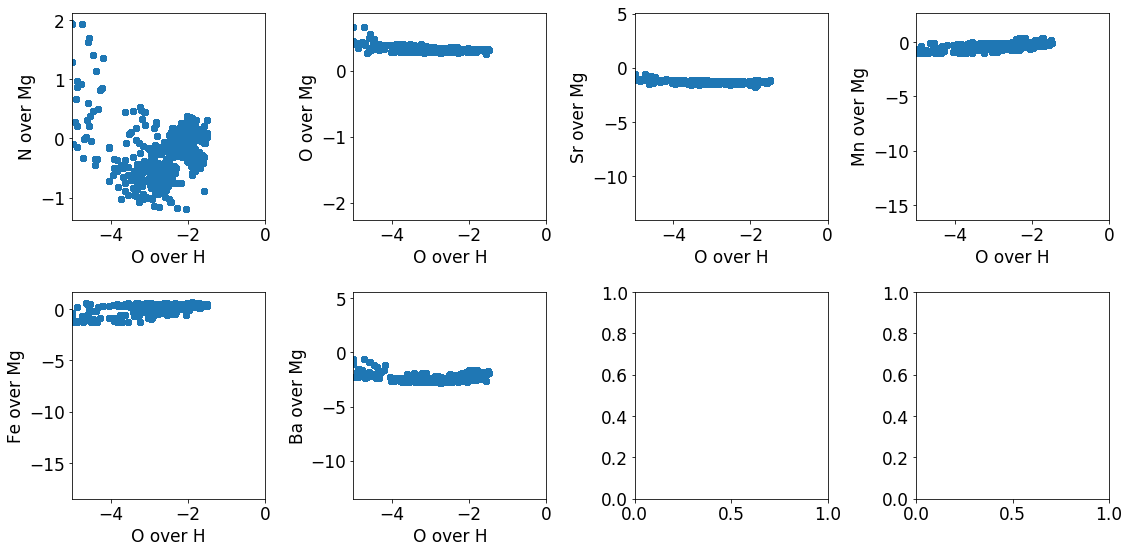

In [11]:
t = 500.0 * yt.units.Myr
select = is_alive(gal.df, t)

elements = ['N','O','Sr','Mg','Mn','Fe','Ba']

nrow = 2
ncol = 4
fig,ax = plt.subplots(nrow, ncol)
fig.set_size_inches(ncol*4,nrow*4)

axi = 0
axj = 0

denom_element = 'Mg'
xdata = gal.df['creation_time'].convert_to_units('Myr')
xdata = xdata - np.min(xdata)

xdata = gal.df[('io','particle_O_over_H')]

bins = np.arange(-30,0, 0.1)
for e in elements:
    index = (axi,axj)
    if e == denom_element:
        continue
        
    ydata = gal.df[('io','particle_' + e + '_over_' + denom_element)]
    
    ax[index].scatter(xdata[select], ydata[select])
    

    #ax[index].set_xlim(-20,0)
    #ax[index].set_ylim(0,1)
    #ax[index].semilogy()
    ax[index].set_ylabel(e + ' over ' + denom_element)
    ax[index].set_xlabel('O over H')
    ax[index].set_xlim(-5,0)

    
    axj = axj + 1
    if axj >= ncol:
        axj = 0
        axi = axi + 1
        
plt.tight_layout()
